- [Heatmap](#Heatmap)
    - [Understanding the data](#Understanding-the-data)
    - [Visualizing heatmap](#Visualizing-heatmap)
    - [I could](#I-could)

# Heatmap

## Understanding the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I have some data that describes locations of touches on ball for each player in matches from Campeonato Brasileiro 2020. The players are from Corinthians, São Paulo and Flamengo.

In [2]:
cor = pd.read_csv('data/corinthians-heatmap-data.csv')
fla = pd.read_csv('data/flamengo-heatmap-data.csv')
sao = pd.read_csv('data/saopaulo-heatmap-data.csv')

cor.head()

,match,player,X,Y
0,Corinthians x Atlético GO,Cássio,3,53
1,Corinthians x Atlético GO,Cássio,11,63
2,Corinthians x Atlético GO,Cássio,13,19
3,Corinthians x Atlético GO,Cássio,4,50
4,Corinthians x Atlético GO,Cássio,4,50


The soccer field is represented by a 2D plan, being $x>50$ the adversary area and $y>50$ the left side of the field.

Looking at some data below, we can see that, for example, Filipe Luís is the player that had most touches for Flamengo.

In [3]:
fla['player'].value_counts().head()

F. Luís            3367
Gerson             2817
Willian Arão       2521
Everton Ribeiro    2446
M. Isla            2219
Name: player, dtype: int64

We also can visualize where was each Filipe Luís touch (remembering: being the adversary goal in the right side of the graph and the upper side being the left side of the field).

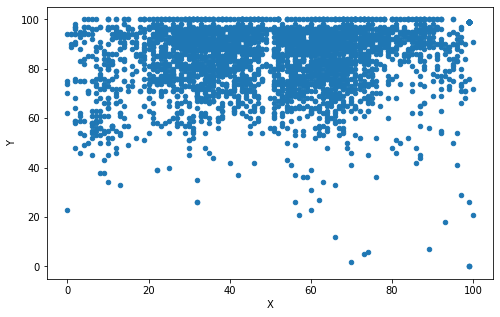

In [4]:
fla[fla['player'] == 'F. Luís'].plot.scatter('X', 'Y', figsize=(5*1.6, 5));

## Visualizing heatmap

However, use the previous visualization (scatter plot) is not very interesting because some points are overlap, so we are incapable to tell with precision where the points, or touches, are more concentrated.

Thinking about that, my goal is to divide the field in areas and, inside each area, get the frequency of touches. This way is easier to compare frequency of touches between different field areas and to achieve that I am going to use `sns.heatmap`.

And is exactly that what my function (`plotHeatmap`) does. Given the data described before, a number of areas by axis to divide the field and some more optional parameters it plots the heatmap.

In [5]:
def plotHeatmap(data, areas_by_axis, figsize=5, **kwargs):
    def findYArea():
        for j in range(areas_by_axis):
            if (i*areas_size) <= x and x <= ((i+1)*areas_size)   and   (j*areas_size) <= y and y <= ((j+1)*areas_size):
                heatmap_df.at[areas_by_axis-j, chr(letter_code)] += 1
                return True
        return False
    
    index = [i+1 for i in range(areas_by_axis)]
    columns = [chr(65+i) for i in range(areas_by_axis)]
    heatmap_df = pd.DataFrame(index=index, columns=columns)
    heatmap_df.fillna(0, inplace=True)
    
    if kwargs.get('player'):
        mask = data['player'] == kwargs.get('player')
        data = data[mask]
    
    for index, row in data.iterrows():
        x, y = row['X'], row['Y']

        areas_size = 100/areas_by_axis
        letter_code = 64
        
        for i in range(areas_by_axis): # For each area in x axis
            letter_code += 1
            if findYArea():
                break
    
    max_value = kwargs.get('max_value')
    if not max_value:
        max_value = heatmap_df.max().max()
    
    fmt = 'd'
    
    if kwargs.get('annot') and kwargs.get('normalize') and not kwargs.get('max_value'):
        heatmap_df = heatmap_df/heatmap_df.sum().sum()
        max_value = None
        fmt = '.2f'
    
    labels = bool(kwargs.get('show_labels'))
    if labels:
        labels = 'auto'
    
    plt.figure(figsize=(figsize*1.6, figsize))
    sns.heatmap(heatmap_df, cmap='Blues', vmin=0, vmax=max_value, annot=kwargs.get('annot'), fmt=fmt,
                xticklabels=labels, yticklabels=labels)
    plt.show()

Corinthians' heatmap divided in 100 areas, 10 per axis.

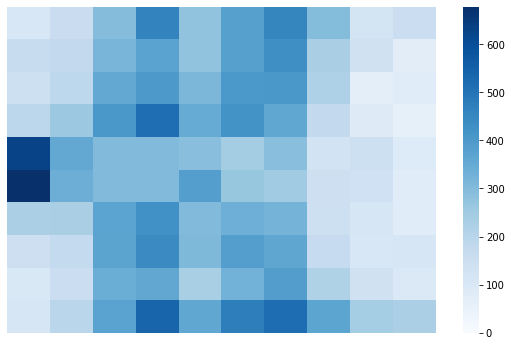

In [6]:
plotHeatmap(cor, 10, figsize=6)

We can also show the number of touches in each area.

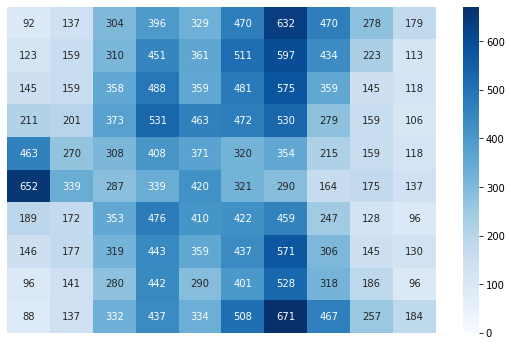

In [41]:
plotHeatmap(fla, 10, figsize=6, annot=True)

And now Filipe Luís' heatmap plotted on my way.

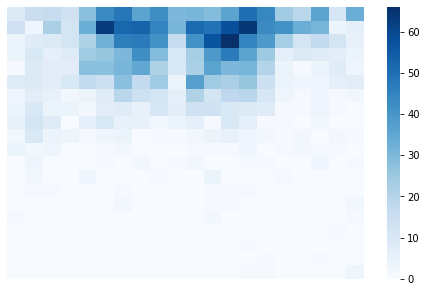

In [43]:
plotHeatmap(fla, 20, player='F. Luís')

Now is easier to say what regions he frequents more.

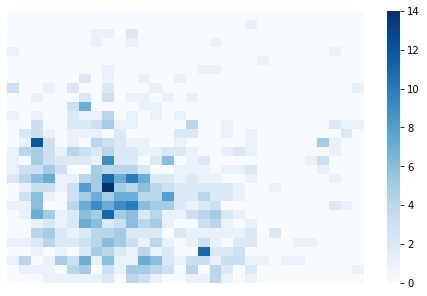

In [27]:
# There is not a limit for areas_by_axis, but lot of areas may not make sense
plotHeatmap(cor, 30, player='B. Méndez')

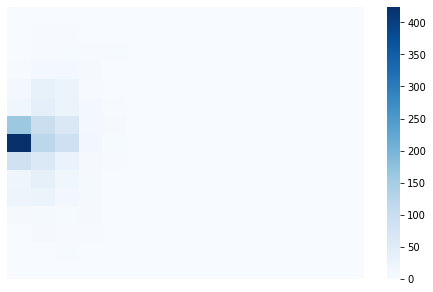

In [31]:
# A goalkeeper to remember that left side is the defense area of the player
plotHeatmap(cor, 15, player='Cássio')

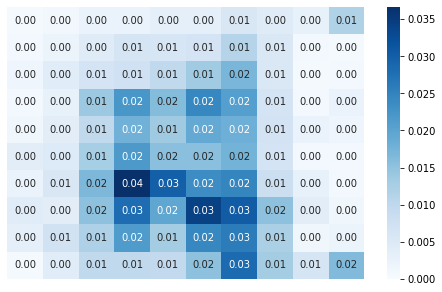

In [32]:
# Showing the frequency normalized of the touches per area
plotHeatmap(sao, 10, player='D. Alves', annot=True, normalize=True)

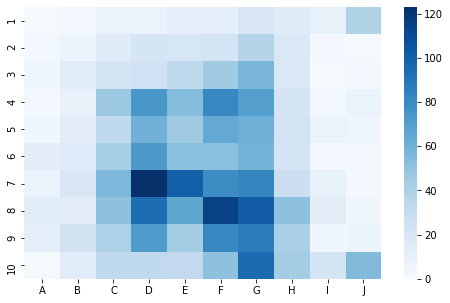

In [35]:
# Showing labels to better reference areas
plotHeatmap(sao, 10, player='D. Alves', show_labels=True)

We can also compare different players, like Gabriel and Jô, both center forwards

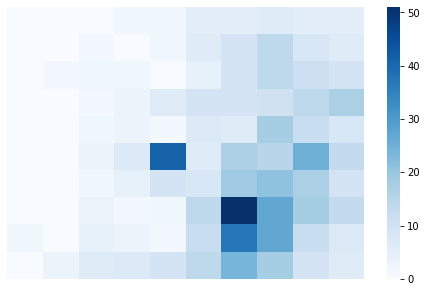

In [38]:
plotHeatmap(fla, 10, player='Gabriel')

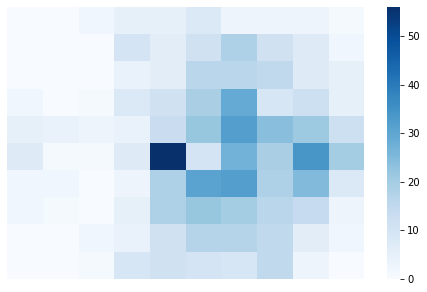

In [39]:
plotHeatmap(cor, 10, player='Jô')

and tell that Gabriel playes more at right that Jô.

## I could

I could just use `sns.kdeplot` to show players heatmaps, however the visualization with `sns.heatmap` is more simple, more intuitive and, mainly, **easier to compare between different teams and players**.

Below two examples with `sns.kdeplot`.

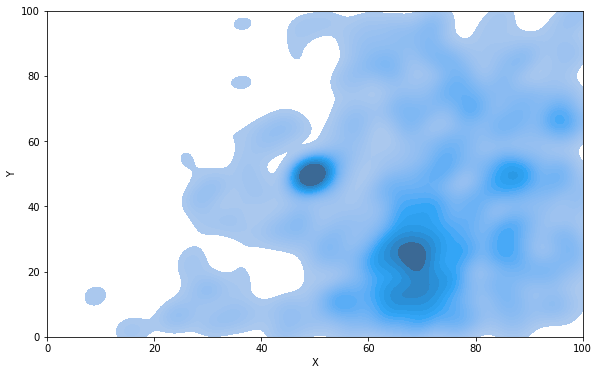

In [40]:
plt.figure(figsize=(6*1.6, 6))
sns.kdeplot(data=fla[fla['player'] == 'Gabriel'], x='X', y='Y', fill=True, levels=25, bw_adjust=0.4);
plt.xlim([0, 100])
plt.ylim([0, 100]);

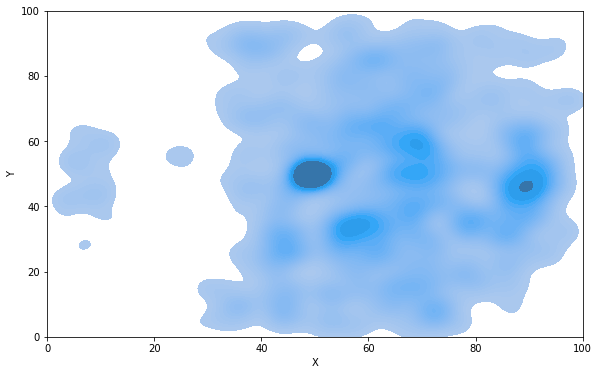

In [41]:
plt.figure(figsize=(6*1.6, 6))
sns.kdeplot(data=cor[cor['player'] == 'Jô'], x='X', y='Y', fill=True, levels=25, bw_adjust=0.4);
plt.xlim([0, 100])
plt.ylim([0, 100]);